- **``Nama : Muhammad Rifqi Nugroho``**
- **``NIM  : 111160940000036``**
- **``UAS Kapsel Komputasi``**

---

# <a name="top"></a>List of References
---
- [Import Dataset and Modules](#1.-Import-Dataset-and-Modules)
    - [Import Some Modules](#Import-Some-Modules) 
    - [Import CSV Files](#Import-CSV-Files)

- [Hypothesis](#2.-Hypothesis)
- [Data Wrangling & Preprocessing](#3.-Data-Wrangling-&-Preprocessing)
    - [Feature Selection](#Feature-Selection)
    - [Missing Value Handling](#Missing-Value-Handling)

- [EDA Analysis](#4.-EDA-Analysis)
    - [Basic Statistic](#Basic_Statistic)
        - [Rating Statistic](#Rating)
    - [Visualisasi](#Visualisasi)
        - [Banyaknya Aplikasi Berdasarkan Kategori](#Banyaknya-Aplikasi-Berdasarkan-Kategori)
        - [Banyaknya Aplikasi Berdasarkan Type(free/paid)](#Banyaknya-Aplikasi-Berdasarkan-Type(free/paid))
        - [Jumlah aplikasi berdasarkan Konten Rating](#Jumlah-aplikasi-berdasarkan-Konten-Rating)
        - [GAME TERPOPULER !!](#Game-Terpopuler-?)
            - [Suka Game Strategi? Boleh dicoba nih](#Kalian-masih-tidak-suka-dengan-game-tersebut-karena-tidak-tertarik-dengan-genrenya-?)
            - [Game Baru diperbarui](#Mau-Game-Yang-Terupdate-?-Boleh-dicoba-nih)
            - [GAME KHUSUS SULTAN, SOBAT MISQUEEN JANGAN DOWNLOAD](#Anda-Sultan?-Wajib-beli-game-ini)
        - [Tempat Belanja Online Terpercaya ?](#Tempat-Belanja-Online-Terpercaya-?)
        - [Aplikasi Untuk Gambar/Design Terbaik](#Aplikasi-Untuk-Gambar/Design-Terbaik)
        - [Aplikasi Bertukar Pesan yang Sering Digunakan Orang](#Aplikasi-Bertukar-Pesan-yang-Sering-Digunakan-Orang)
        - [Aplikasi Sosial Media untuk yang suka membagikan tentang kehidupan kalian](#Aplikasi-Sosmed-Terpopuler)
        - [Suka Mengasah Otak? Atau ingin belajar lebih di HP? Boleh Coba Aplikasi Belajar ini](#Aplikasi-Edukasi-Terpopuler)

5. [Kesimpulan](#5.-Kesimpulan)

# 1. Import Dataset and Modules

Code diambil dari ``github`` (https://github.com/taufikedys/tau-data) dan beberapa sumber lainnya ``di google``.
Dan datanya mengenai aplikasi yang terdapat ``di google playstore``, diambil dari dataset ``di kaggle`` (https://www.kaggle.com/lava18/google-play-store-apps) dengan diubah secara manual karena keterbatasan ilmu saya dan untuk mempermudah menganalisa, jadi hanya mengambil data aplikasi dengan kategori :
- Art and Design
- Communication
- Education
- Social
- Game
- Shopping

## Import Some Modules

In [401]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('bmh'); sns.set()
print("Module Imported")

Module Imported


## Import CSV Files

In [402]:
gplay = pd.read_csv("gplay.csv")
print("import succes")
gplay.head()

import succes


,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated,Android_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,01/07/18,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design,01/15/18,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,08/01/18,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,06/08/18,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,06/20/18,4.4 and up


[Go to top](#top)

# 2. Hypothesis

[Go to top](#top)

# 3. Data Wrangling & Preprocessing

## Feature Selection

Akan dipilih variabel yang kemungkinan tidak akan digunakan

In [403]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 12 columns):
App                964 non-null object
Category           964 non-null object
Rating             962 non-null float64
Reviews            964 non-null int64
Size               964 non-null object
Install            964 non-null int64
Type               964 non-null object
Price              964 non-null float64
Content_Rating     964 non-null object
Genres             964 non-null object
Last_Updated       954 non-null object
Android_Version    964 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 90.5+ KB


Drop kolom Android Version, karena tidak akan digunakan dalam analisa ini

In [404]:
gplay.drop("Android_Version", axis=1, inplace=True)
print("Dropped")

Dropped


## Missing Value Handling

Akan dicek apakah data terdapat bagian yang hilang atau tidak, jika ada maka akan diatasi dengan metode mean atau rata-rata

In [405]:
gplay.isnull().sum()

App                0
Category           0
Rating             2
Reviews            0
Size               0
Install            0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated      10
dtype: int64

Mulai dari menghandling missing value data numerik

In [406]:
gplay.fillna(gplay.mean(), inplace = True)
print (gplay.isna().sum())

App                0
Category           0
Rating             0
Reviews            0
Size               0
Install            0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated      10
dtype: int64


Kemudian dilanjutkan dengan data kategorik

In [407]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
gplay2 = DataFrameImputer().fit_transform(gplay)
gplay2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Install           0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
dtype: int64

*Semua data sudah tidak ada missing value*

[Go to top](#top)

# 4. EDA Analysis

## Basic Statistic

### *Rating*
*Akan dicari*
    
    a. total aplikasi berdasarkan rating
    b. rating rata-rata aplikasi berdasarkan kategori
    c. rating terbesar tiap kategori

**a. total aplikasi berdasarkan rating**

In [408]:
gplay2.groupby(["Rating"]).count()

,App,Category,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
Rating,,,,,,,,,,
3.100000,1,1,1,1,1,1,1,1,1,1
3.200000,1,1,1,1,1,1,1,1,1,1
3.300000,1,1,1,1,1,1,1,1,1,1
3.400000,1,1,1,1,1,1,1,1,1,1
3.500000,1,1,1,1,1,1,1,1,1,1
3.600000,6,6,6,6,6,6,6,6,6,6
3.700000,5,5,5,5,5,5,5,5,5,5
3.800000,12,12,12,12,12,12,12,12,12,12
3.900000,9,9,9,9,9,9,9,9,9,9


*Aplikasi terbanyak berada pada Rating 4.4 yaitu sebanyak 159 Aplikasi*

**b. rating rata-rata aplikasi berdasarkan kategori**

In [409]:
Kategori = gplay2.groupby(["Category"]).mean()
print(Kategori.shape)
Kategori

(6, 4)


,Rating,Reviews,Install,Price
Category,,,,
ART_AND_DESIGN,4.317606,2.877773e+04,2.326429e+06,0.000000
COMMUNICATION,4.260284,3.876096e+06,1.586362e+08,0.028298
EDUCATION,4.388863,2.538191e+05,5.586231e+06,0.115128
GAME,4.454848,3.476595e+06,7.413795e+07,0.132715
SHOPPING,4.302041,5.996957e+05,1.715612e+07,0.000000
SOCIAL,4.255455,3.728013e+06,8.272318e+07,0.000000


**c. rating maksimum tiap kategori**

Di sini hanya diambil salah satu aplikasi pada kategori tertentu yang memiliki rating terbesar

In [410]:
Kategorimax = gplay2.groupby(["Category"]).max()
print(Kategorimax.shape)
Kategorimax

(6, 10)


,App,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
Category,,,,,,,,,,
ART_AND_DESIGN,ibis Paint X,4.8,295221,Varies with device,50000000,Free,0.00,Teen,Art & Design,12/17/17
COMMUNICATION,mysms SMS Text Messaging Sync,4.8,69119316,Varies with device,1000000000,Paid,3.99,Teen,Communication,12/04/17
EDUCATION,"play2prep: ACT, SAT prep",4.9,6290507,Varies with device,100000000,Paid,5.99,Teen,Education,12/29/17
GAME,slither.io,4.9,44893888,Varies with device,1000000000,Paid,9.99,Teen,Word,12/29/17
SHOPPING,zulily - Shop Daily Deals in Fashion and Home,4.7,6212081,Varies with device,100000000,Free,0.00,Teen,Shopping,12/22/17
SOCIAL,"💘 WhatsLov: Smileys of love, stickers and GIF",4.8,78158306,Varies with device,1000000000,Free,0.00,Teen,Social,12/05/17


In [411]:
gplay2.loc[(gplay2.App == "ibis Paint X")]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31,10000000,Free,0.0,Everyone,Art & Design,07/30/18


Ternyata  Rating aplikasi ibis Paint X hanya 4.6, jadi kemungkinan kodingannya salah, akan tetapi rating terbesar tersebut bisa dipakai untuk jadi patokan melihat aplikasi dengan rating  terbesar tersebut.

### *__Jadi bagaimana cara melihat semua aplikasi dengan rating terbesar ?__*

Dengan melihat patokan rating terbesar di atas, ambil kategori aplikasi dan rating terbesarnya

1. Kategori ``ART_AND_DESIGN``

In [412]:
gplay2.loc[(gplay2.Category == "ART_AND_DESIGN") & (gplay2.Rating >= 4.8)]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6,10000,Free,0.0,Everyone,Art & Design,04/25/18


2. Kategori ``Communication``

In [413]:
gplay2.loc[(gplay2.Category == "COMMUNICATION") & (gplay2.Rating == 4.8)]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
152,Should I Answer?,COMMUNICATION,4.8,237468,8.8,1000000,Free,0.0,Everyone,Communication,07/26/18


3. Kategori ``Education``

In [414]:
gplay2.loc[(gplay2.Category == "EDUCATION") & (gplay2.Rating == 4.9)]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
203,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26,1000000,Free,0.00,Everyone,Education,07/20/18
342,Sago Mini Hat Maker,EDUCATION,4.9,11,63,1000,Paid,3.99,Everyone,Education,07/24/17


4. Kategori ``Game``

In [415]:
gplay2.loc[(gplay2.Category == "GAME") & (gplay2.Rating == 4.9)]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
526,The Room: Old Sins,GAME,4.9,21119,48,100000,Paid,4.99,Everyone,Puzzle,04/18/18


5. Kategori ``Shopping``

In [416]:
gplay2.loc[(gplay2.Category == "SHOPPING") & (gplay2.Rating == 4.7)]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
837,The birth,SHOPPING,4.7,1084945,Varies with device,50000000,Free,0.0,Teen,Shopping,08/03/18
847,Mercado Libre: Find your favorite brands,SHOPPING,4.7,3860225,Varies with device,50000000,Free,0.0,Everyone,Shopping,08/03/18
882,Nike,SHOPPING,4.7,67071,40,1000000,Free,0.0,Everyone,Shopping,08/01/18
890,"Shopular: Coupons, Weekly Ads & Shopping Deals",SHOPPING,4.7,57920,Varies with device,1000000,Free,0.0,Everyone,Shopping,05/31/18
911,"Shopular: Coupons, Weekly Ads & Shopping Deals",SHOPPING,4.7,57920,Varies with device,1000000,Free,0.0,Everyone,Shopping,05/31/18
934,ASOS,SHOPPING,4.7,181798,22,10000000,Free,0.0,Everyone,Shopping,07/30/18
963,ASOS,SHOPPING,4.7,181823,22,10000000,Free,0.0,Everyone,Shopping,07/30/18


6. Kategori ``Social``

In [417]:
gplay2.loc[(gplay2.Category == "SOCIAL") & (gplay2.Rating == 4.8)]

,App,Category,Rating,Reviews,Size,Install,Type,Price,Content_Rating,Genres,Last_Updated
734,Amino: Communities and Chats,SOCIAL,4.8,1259075,62,10000000,Free,0.0,Teen,Social,07/20/18


**d. Distribution Plot**

Distribution plot berdasarkan rating aplikasi

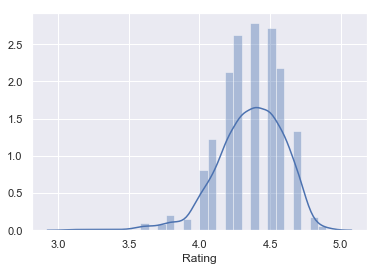

In [418]:
sns.distplot(gplay2.Rating, kde=True)

[Go to top](#top)

## Visualisasi

Akan dilakukan visualisasi dari data yang digunakan agar mendapatkan insight

### Banyaknya Aplikasi Berdasarkan Kategori

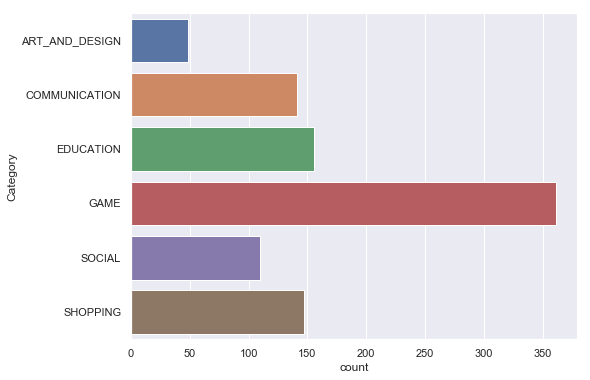

In [419]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(y="Category", data=gplay2)

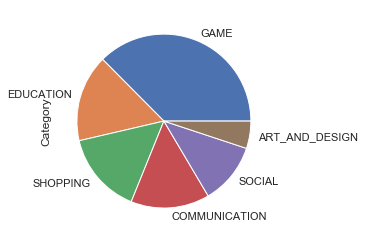

In [420]:
p = gplay2.Category.value_counts().plot(kind='pie')

### Banyaknya Aplikasi Berdasarkan Type(free/paid)

In [421]:
CT = pd.crosstab(index=gplay2["Type"], columns=gplay2["Category"])
CT

Category,ART_AND_DESIGN,COMMUNICATION,EDUCATION,GAME,SHOPPING,SOCIAL
Type,,,,,,
Free,49,140,152,352,147,110
Paid,0,1,4,9,0,0


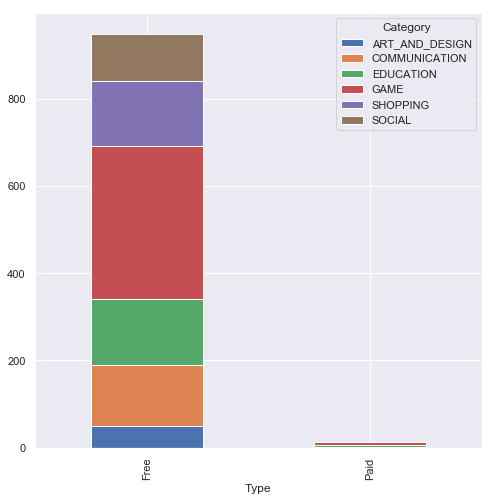

In [422]:
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

### Jumlah aplikasi berdasarkan Konten Rating

In [423]:
print(gplay2.select_dtypes(include = ['category']).columns)

Index([], dtype='object')


Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Category,,,,
ART_AND_DESIGN,45.0,1.0,NaN,3.0
COMMUNICATION,128.0,NaN,5.0,8.0
EDUCATION,144.0,8.0,3.0,1.0
GAME,216.0,50.0,16.0,79.0
SHOPPING,114.0,NaN,NaN,33.0
SOCIAL,35.0,1.0,38.0,36.0


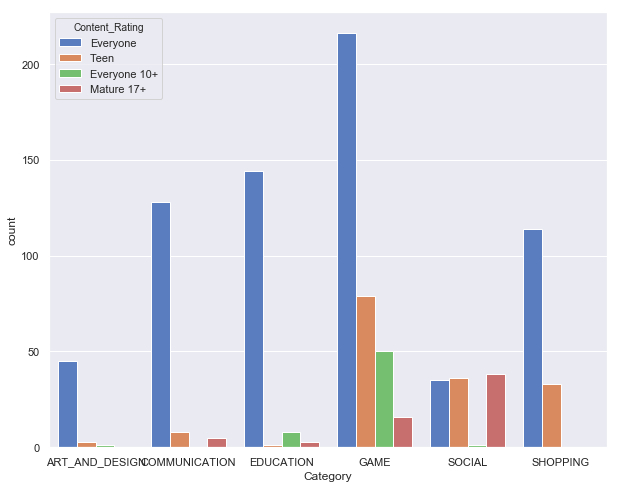

In [424]:
col = 'Category'
plt.figure(figsize=(10,8))
ax = sns.countplot(x = col, hue = 'Content_Rating', palette = 'muted', data=gplay2)
# Semakin mudah fungsi visualisasi, maka semakin sulit utk di kustomisasi
# Cara diatas sdh sulit digunakan karena struktur data di ax sdh tidak memuat data
gplay2.groupby(["Category", "Content_Rating"]).size().unstack() # Trick sederhana menghindari pemrograman yg overwhelming

Semua Kategori cenderung lebih banyak untuk aplikasi dengan Content Rating ``Everyone``, ``kecuali`` untuk ``aplikasi social`` yang cenderung sama kecuali untuk everyone10+, jadi khusus aplikasi sosial banyak yang khusus digunakan untuk ``mereka yang sudah dewasa``

### Game Terpopuler ?

Saya mengasumsikan game terpopuler dilihat dari berbagai ketentuan yaitu :
    1. Rating minimum 4.6
    2. sudah diinstall lebih dari (atau sama dengan) 10jt kali
    3. Direview lebih dari 100000
    4. Urutkan berdasarkan rating terlebih dahulu, kemudian jumlah diinstall
    
**Akan dilihat 5 Game Terpopuler versi saya**

In [425]:
game = gplay2.loc[(gplay2.Category == "GAME") & (gplay2.Rating >= 4.6) & (gplay2.Install >= 10000000) & (gplay2.Reviews >= 100000)]
top_game = game.sort_values('Install', ascending=0).sort_values('Rating', ascending=0).drop_duplicates('App')
top_5_game = top_game[['App','Rating','Install','Type','Genres']]
top_5_game.head(5)

,App,Rating,Install,Type,Genres
407,Wordscapes,4.8,10000000,Free,Word
513,"Cash, Inc. Money Clicker Game & Business Adven...",4.8,10000000,Free,Simulation
370,Bubble Witch 3 Saga,4.7,50000000,Free,Puzzle
615,Bowmasters,4.7,50000000,Free,Action
632,CATS: Crash Arena Turbo Stars,4.7,50000000,Free,Action


Di atas hanya terlihat game dengan ``type free`` atau gratis, jadi akan dicoba **``Game Terpopuler Berbayar``**

In [426]:
game = gplay2.loc[(gplay2.Type == "Paid") & (gplay2.Category == "GAME") & (gplay2.Rating >= 4.6) & (gplay2.Install >= 10000000) & (gplay2.Reviews >= 100000)]
top_paidgame = game.sort_values('Install', ascending=0).sort_values('Rating', ascending=0).drop_duplicates('App')
top_5_paidgame = top_paidgame[['App','Rating','Install','Type','Genres']]
top_5_paidgame.head(5)

,App,Rating,Install,Type,Genres


Ternyata tidak muncul, kemungkinan terlalu besar antara rating/install/rivewnya, maka ketentuannya akan saya kecilkan menjadi :
    1. Rating minimum 4.4
    2. sudah diinstall lebih dari (atau sama dengan) 100rb kali
    3. Direview lebih dari 10000
    4. Urutkan berdasarkan rating terlebih dahulu, kemudian jumlah diinstall
    
**Akan dilihat 5 Game Berbayar Terpopuler versi saya**

In [427]:
game = gplay2.loc[(gplay2.Type == "Paid") & (gplay2.Category == "GAME") & (gplay2.Rating >= 4.4) & (gplay2.Install >= 100000) & (gplay2.Reviews >= 10000)]
top_paidgame = game.sort_values('Install', ascending=0).sort_values('Rating', ascending=0).drop_duplicates('App')
top_5_paidgame = top_paidgame[['App','Rating','Install','Type','Genres']]
top_5_paidgame.head(5)

,App,Rating,Install,Type,Genres
526,The Room: Old Sins,4.9,100000,Paid,Puzzle
525,Clue,4.6,100000,Paid,Board
529,RollerCoaster Tycoon® Classic,4.6,100000,Paid,Simulation
528,Farming Simulator 18,4.5,100000,Paid,Simulation
531,Star Wars ™: DIRTY,4.5,100000,Paid,Role Playing


**Visualisasi Top Game Berdasarkan Rating**

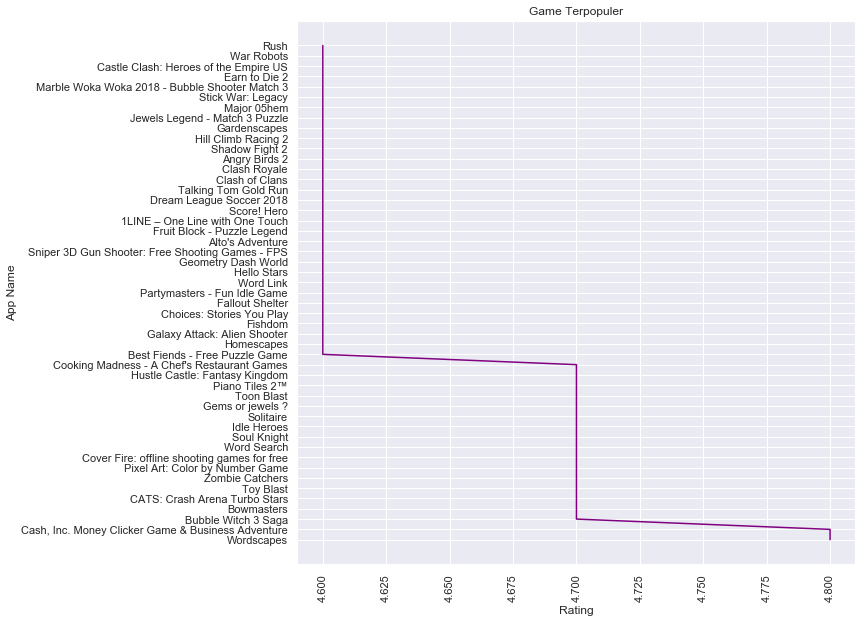

In [428]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(top_game['Rating'],
        top_game['App'],
        color='purple')
ax.set(xlabel="Rating",
       ylabel="App Name",
       title="Game Terpopuler")
plt.xticks(rotation=90)
plt.show()

### Kalian masih tidak suka dengan game tersebut karena tidak tertarik dengan genrenya ?

Oke oke akan saya coba dengan genre yang spesifik, misalnya genre strategy karena menurut saya ini genre yang cukup populer, tapi masih sama ketentuannya dengan game populer sebelumnya (yang free)

**Akan dilihat 5 Game Strategi terpopuler versi saya**

In [429]:
strgame = gplay2.loc[(gplay2.Category == "GAME") & (gplay2.Rating >= 4.6) & (gplay2.Install >= 10000000) & (gplay2.Reviews >= 100000) & (gplay2.Genres == "Strategy")]
top_strgame = strgame.sort_values('Install', ascending=0).sort_values('Rating', ascending=0).drop_duplicates('App')
top_5_strgame = top_strgame[['App','Rating','Install','Type','Genres']]
top_5_strgame.head(5)

,App,Rating,Install,Type,Genres
353,Clash Royale,4.6,100000000,Free,Strategy
363,Clash of Clans,4.6,100000000,Free,Strategy
483,Castle Clash: Heroes of the Empire US,4.6,50000000,Free,Strategy
691,Stick War: Legacy,4.6,10000000,Free,Strategy


Ternyata hanya ada 4 saja gamenya (dengan ketentuan yang sama)

### Mau Game Yang Terupdate ? Boleh dicoba nih

Di sini akan ditampilkan top game terupdate untuk kalian yang suka game terupdate

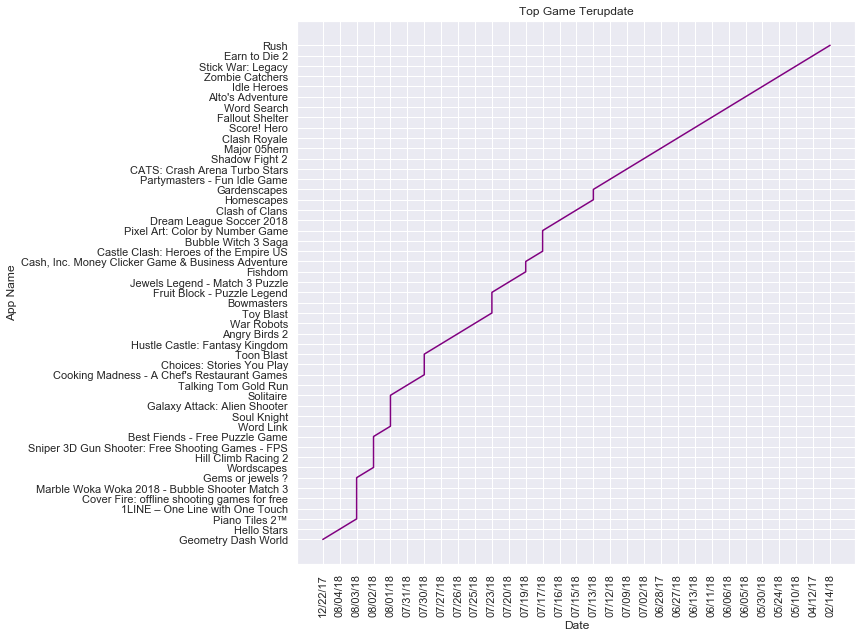

In [430]:
fig, ax = plt.subplots(figsize=(10, 10))
top_game_updated = top_game.sort_values('Last_Updated', ascending=0)
ax.plot(top_game_updated['Last_Updated'],
        top_game_updated['App'],
        color='purple')
ax.set(xlabel="Date",
       ylabel="App Name",
       title="Top Game Terupdate")
plt.xticks(rotation=90)
plt.show()

#### Pengen Liat 5 Teratas Aja?

In [432]:
top_5_game_updated = top_game_updated[['App','Rating','Install','Type','Genres','Last_Updated']]
top_5_game_updated.head()

,App,Rating,Install,Type,Genres,Last_Updated
389,Geometry Dash World,4.6,10000000,Free,Arcade,12/22/17
480,Hello Stars,4.6,10000000,Free,Puzzle,08/04/18
456,Piano Tiles 2™,4.7,100000000,Free,Arcade,08/03/18
690,1LINE – One Line with One Touch,4.6,10000000,Free,Board,08/03/18
630,Cover Fire: offline shooting games for free,4.7,10000000,Free,Action,08/03/18


Np : Tanggalnya belum terurut dari yang terbaru, sudah saya coba urutkan akan tetapi belum menemukan code yang pas

### Anda Sultan? Wajib beli game ini

5 Game dengan biaya install yang paling mahal akan ditampilkan di sini, yang pastinya terpopuler

In [434]:
game = gplay2.loc[(gplay2.Type == "Paid") & (gplay2.Category == "GAME") & (gplay2.Rating >= 4.4) & (gplay2.Install >= 100000) & (gplay2.Reviews >= 10000)]
top_sultangame = game.sort_values('Price', ascending=0).drop_duplicates('App')
top_5_sultangame = top_sultangame[['App','Rating','Install','Price','Genres']]
top_5_sultangame.head(5)

,App,Rating,Install,Price,Genres
531,Star Wars ™: DIRTY,4.5,100000,9.99,Role Playing
529,RollerCoaster Tycoon® Classic,4.6,100000,5.99,Simulation
526,The Room: Old Sins,4.9,100000,4.99,Puzzle
528,Farming Simulator 18,4.5,100000,4.99,Simulation
524,The Game of Life,4.4,100000,2.99,Board


*Ternyata Gamenya gak mahal-mahal amat ya(?)*

### Tempat Belanja Online Terpercaya ?

Kaum milenials jaman sekarang lebih suka belanja online daripada belanja langsung ke tokonya, akan tetapi masih banyak juga yang ragu apakah aplikasi ini penipu atau bukan, maka dari itu akan saya coba untuk menampilkan aplikasi belanja online terpercaya berdasarkan berbagai ketentuan berikut ini :
    1. Rating minimum 4.5
    2. sudah diinstall lebih dari (atau sama dengan) 10jt kali
    3. Direview lebih dari 500rb orang
    4. Urutkan berdasarkan jumlah diinstall dan jumlah reviews (rating tidak perlu, karena rating 4.5 menurut saya sudah sangat bagus apalagi jika sudah banyak yang install dan review, karena sudah banyak orang yang menggunakannya jadi orang lain akan menganggap aplikasi tersebut terpercaya)
    
**Akan dilihat 5 Aplikasi Shopping Terpercaya versi saya**

In [154]:
shop = gplay2.loc[(gplay2.Category == "SHOPPING") & (gplay2.Rating >= 4.5) & (gplay2.Install >= 10000000) & (gplay2.Reviews >= 500000)]
top_shop = shop.sort_values('Install', ascending=0).sort_values('Reviews', ascending=0).drop_duplicates('App')
top_5_shop = top_shop[['App','Rating','Install','Type','Reviews']]
top_5_shop.head(5)

,App,Rating,Install,Type,Reviews
959,Wish - Shopping Made Fun,4.5,100000000,Free,6212081
953,"AliExpress - Smarter Shopping, Better Living",4.6,100000000,Free,5917485
847,Mercado Libre: Find your favorite brands,4.7,50000000,Free,3860225
879,"Groupon - Shop Deals, Discounts & Coupons",4.6,50000000,Free,1370749
837,The birth,4.7,50000000,Free,1084945


### Aplikasi Untuk Gambar/Design Terbaik

Sekarang kalau ingin gambar atau design tidak perlu di kertas atau komputer, kita bisa melakukannya di smartphone kita, maka dari itu boleh dicoba aplikasi terbaik untuk kalian yang suka design atau gambar ini yang akan ditampilkan berdasarkan :
    1. Rating minimum 4.4
    2. Sudah diinstall lebih dari (atau sama dengan) 1jt kali
    3. Direview lebih dari 50rb orang
    4. Urutkan berdasarkan jumlah diinstall, rating dan jumlah reviews
    
**Akan dilihat 5 Aplikasi Gambar/Design terbaik versi saya**

In [174]:
art = gplay2.loc[(gplay2.Category == "ART_AND_DESIGN") & (gplay2.Rating >= 4.4) & (gplay2.Install >= 1000000) & (gplay2.Reviews >= 50000)]
top_art = art.sort_values('Install', ascending=0).sort_values('Reviews', ascending=0).sort_values('Rating', ascending=0).drop_duplicates('App')
top_5_art = top_art[['App','Rating','Install','Type','Reviews']]
top_5_art.head(5)

,App,Rating,Install,Type,Reviews
45,"Canva: Poster, banner, card maker & graphic de...",4.7,10000000,Free,174531
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5000000,Free,87510
19,ibis Paint X,4.6,10000000,Free,224399
3,Sketch - Draw & Paint,4.5,50000000,Free,215644
42,Textgram - write on photos,4.4,10000000,Free,295221


[Go to top](#top)

### Aplikasi Bertukar Pesan yang Sering Digunakan Orang

Udah gak jaman lagi bertukar pesan dengan sms berbayar, apalagi menggunakan pos. Sekarang jamannya bertukar pesan menggunakan aplikasi, disamping gratis menggunakan aplikasi juga lebih berfungsi dibandingkan sms biasa karena dia juga terkadang bisa mengirim file ataupun gambar dan bisa juga videocall. Nah aplikasi apa sih yang sering digunakan orang untuk bertukar pesan?. Berikut akan ditampilkan aplikasi bertukar pesan terpopuler berdasarkan :
    1. Rating minimum 4.0
    2. sudah diinstall lebih dari (atau sama dengan) 10jt kali
    3. Direview lebih dari 500rb orang
    4. Urutkan berdasarkan jumlah diinstall dan jumlah reviews (disini tidak dilihat berdasarkan rating, akan tetapi lebih ke jumlah penggunanya)
    
**Akan dilihat 5 Aplikasi Bertukar Pesan yang Paling Sering Digunakan versi saya**

In [188]:
comm = gplay2.loc[(gplay2.Category == "COMMUNICATION") & (gplay2.Rating >= 4.0) & (gplay2.Install >= 10000000) & (gplay2.Reviews >= 500000)]
top_comm = comm.sort_values('Install', ascending=0).sort_values('Reviews', ascending=0).drop_duplicates('App')
top_5_comm = top_comm[['App','Rating','Install','Type','Reviews']]
top_5_comm.head(5)

,App,Rating,Install,Type,Reviews
95,WhatsApp Messenger,4.4,1000000000,Free,69119316
96,Messenger – Text and Video Chat for Free,4.0,1000000000,Free,56646578
134,UC Browser - Fast Download Private & Secure,4.5,500000000,Free,17714850
120,BBM - Free Calls & Messages,4.3,100000000,Free,12842860
181,Viber Messenger,4.3,500000000,Free,11335255


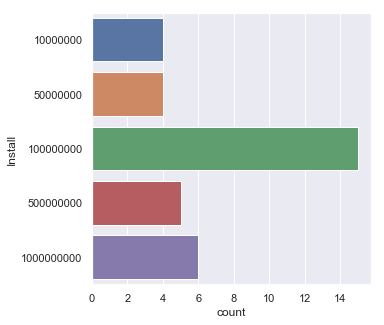

In [396]:
plt.figure(figsize=(5,5)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(y="Install", data=top_comm)

Aplikasi komunikasi yang didownload oleh 100jt orang adalah yang terbanyak

### Aplikasi Sosmed Terpopuler

Untuk kalian yang ingin membagikan tentang kehidupan kalian dengan orang lain, kalian bisa menggunakan aplikasi sosial media. Tapi apa saja aplikasi terpopuler ? Akan ditentukan aplikasi sosmed terpopuler berdasarkan ketentuan berikut ini :
    1. Rating minimum 4.0
    2. sudah diinstall lebih dari (atau sama dengan) 10jt kali
    3. Direview lebih dari 300rb orang
    4. Urutkan berdasarkan jumlah diinstall dan jumlah reviews (disini tidak dilihat berdasarkan rating, akan tetapi lebih ke jumlah penggunanya)
    
**Akan dilihat 5 Aplikasi Sosmed Terpopuler versi saya**

In [190]:
social = gplay2.loc[(gplay2.Category == "SOCIAL") & (gplay2.Rating >= 4.0) & (gplay2.Install >= 10000000) & (gplay2.Reviews >= 500000)]
top_social = social.sort_values('Install', ascending=0).sort_values('Reviews', ascending=0).drop_duplicates('App')
top_5_social = top_social[['App','Rating','Install','Type','Reviews']]
top_5_social.head(5)

,App,Rating,Install,Type,Reviews
707,Facebook,4.1,1000000000,Free,78158306
767,Instagram,4.5,1000000000,Free,66577446
773,Snapchat,4.0,500000000,Free,17015352
709,Facebook Lite,4.3,500000000,Free,8606259
717,Google+,4.2,1000000000,Free,4831125


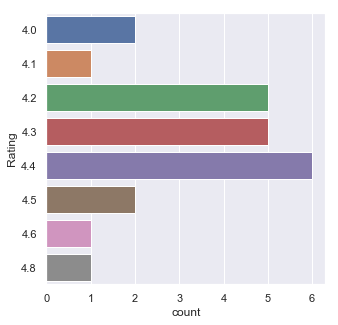

In [394]:
plt.figure(figsize=(5,5)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(y="Rating", data=top_social)

Ternyata Aplikasi terbanyak pada kategori Sosial Terpopuler memiliki rating 4.4 

### Aplikasi Edukasi Terpopuler

Untuk kalian yang tertarik untuk mengasah otak, atau  menambah ilmu kalian, tidak ada salahnya untuk mencoba aplikasi ini. Karena untuk belajar itu tidak harus di kelas, kalian bisa melakukannya sambil rebahan di rumah menggunakan smart phone kalian. Oleh karena itu akan ditunjukkan Aplikasi Edukasi terpopuler dengan ketentuan :
    1. Rating minimum 4.5
    2. Sudah diinstall lebih dari (atau sama dengan) 1jt kali
    3. Direview lebih dari 100rb orang
    4. Urutkan berdasarkan jumlah diinstall, rating dan jumlah reviews
    
**Akan dilihat 5 Aplikasi Edukasi Terpopuler versi saya**

In [196]:
edu = gplay2.loc[(gplay2.Category == "EDUCATION") & (gplay2.Rating >= 4.5) & (gplay2.Install >= 1000000) & (gplay2.Reviews >= 100000)]
top_edu = edu.sort_values('Install', ascending=0).sort_values('Reviews', ascending=0).sort_values('Rating', ascending=0).drop_duplicates('App')
top_5_edu = top_edu[['App','Rating','Install','Type','Reviews']]
top_5_edu.head(5)

,App,Rating,Install,Type,Reviews
203,"Learn Japanese, Korean, Chinese Offline & Free",4.9,1000000,Free,133136
339,SoloLearn: Learn to Code for Free,4.8,1000000,Free,256079
317,Duolingo: Learn Languages Free,4.7,100000000,Free,6290507
289,Free english course,4.7,5000000,Free,142632
227,English with Lingualeo,4.7,5000000,Free,254519


[Go to top](#top)

## 5. Kesimpulan

**Dari Analisis Di atas dapat disimpulkan bahwa :**
    - Sebanyak 144 aplikasi berada pada rating 4.4
    - Rata-rata rating aplikasi tiap kategori(dibulatkan) :
        - ART_AND_DESIGN = 4.318
        - COMMUNICATION = 4.260
        - EDUCATION = 4.389
        - GAME = 4.455
        - SHOPPING = 4.302
        - SOCIAL = 4.225
    - Rating terbesar aplikasi berada di kategori EDUCATION dan GAME dengan rating 4.9
    - GAME menemati aplikasi terbanyak berdasarkan kategori
    - Jumlah Aplikasi berbayar sebanyak 14 dan yang paling banyak adalah game sebanyak 9 aplikasi berbayar
    - Konten rating semua kategori aplikasi cenderung lebih banyak "everyone", kecuali Aplikasi SOCIAL
    - Game paling populer berbayar no. 1 adalah ``The room : Old Sins``
    - Game strategi no.1 adalah Clash Royale
    - Game termahal adalah Starwars DIRTY dengan harga $99
    - Popular APPS:
        - Game paling populer no.1 adalah ``Wordscapes``
        - SHOPPING APP no.1 adalah ``Wis-Shopping MadeFun``
        - ART_AND_DESIGN APP no.1 adalah ``Canva``
        - COMMUNICATION APP no.1 adalah ``WhatsApp``
        - SOCIAL APP no.1 adalah Facebook
        - EDUCATION APP no.1 adalah Learn Japanese, Korean, Chinese Offline